# Explore here

In [18]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')


In [19]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

In [25]:
# Artist ID for Drake
artist_id = "3TVXtAsR1Inumwj472S9r4"

# Fetch top tracks
response = sp.artist_top_tracks(artist_id)

if response:
    # Get the top tracks (list of tracks)
    tracks = response['tracks']
    
    # Extract relevant data: name, popularity, duration (in minutes)
    tracks = [
        {
            "name": track["name"],
            "popularity": track["popularity"],
            "duration": (track["duration_ms"] / (1000 * 60))  # Convert duration to minutes
        }
        for track in tracks
    ]


In [26]:
import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(3))

         name  popularity  duration
3    She Will          75  5.097333
9   Headlines          77  3.933100
8  God's Plan          78  3.316217


In [28]:
print(tracks_df.head())

                              name  popularity  duration
3                         She Will          75  5.097333
9                        Headlines          77  3.933100
8                       God's Plan          78  3.316217
7                     Passionfruit          78  4.982333
6  WAIT FOR U (feat. Drake & Tems)          79  3.164883


In [29]:
print(tracks_df.columns)

Index(['name', 'popularity', 'duration'], dtype='object')


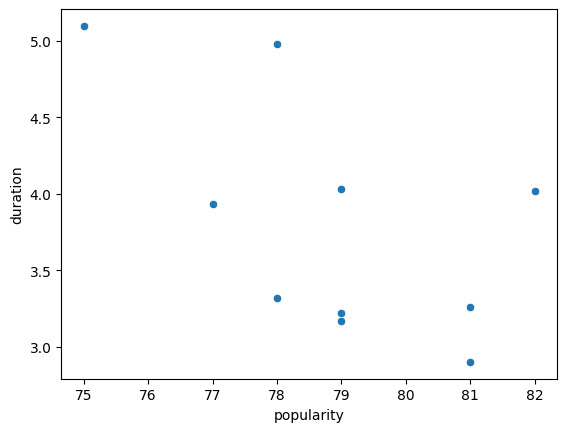

In [30]:
scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration")
fig = scatter_plot.get_figure()